# **Covid Tweet Modeling Clustering**

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df = pd.read_excel("dataset1.xlsx")

In [3]:
# lets try to look the data
df.head()

,date,username,replies,retweets,favorites,text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2020-04-15 15:21:15,WHO,38,195,507,"""Our commitment to public health, science and ...",NaN,NaN,NaN,NaN,NaN
1,2020-04-15 15:20:36,WHO,21,100,339,We also work with countries to strengthen heal...,NaN,NaN,NaN,NaN,NaN
2,2020-04-15 15:19:58,WHO,25,100,285,"""With support from the people and government o...",NaN,NaN,NaN,NaN,NaN
3,2020-04-15 15:19:35,WHO,79,152,345,"""That creed remains our vision today. The has ...",NaN,NaN,NaN,NaN,NaN
4,2020-04-15 15:18:41,WHO,25,116,346,"""They expressed that desire in the @WHO consti...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1708, 11)

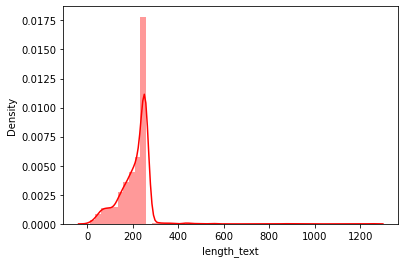

In [5]:
df['length_text'] = df['text'].str.len()
sns.distplot(df['length_text'], color="r")
plt.show()

In [1]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

stopwords.words("english")[:10] # <-- import the english stopwords

In [7]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english") if len(w)>=3]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [8]:
# df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df['cleaned'] = df['text'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [9]:
df[['text','cleaned']]

,text,cleaned
0,"""Our commitment to public health, science and ...",commitment public health science serving peopl...
1,We also work with countries to strengthen heal...,also work countries strengthen health systems ...
2,"""With support from the people and government o...",support people government works improve health...
3,"""That creed remains our vision today. The has ...",creed remains vision today longstanding genero...
4,"""They expressed that desire in the @WHO consti...",expressed desire constitution says enjoyment h...
...,...,...
1703,The lack of visible smog is no indication that...,lack visible smog indication air healthy acros...
1704,"#AirPollution is hard to escape, no matter how...",airpollution hard escape matter rich area live...
1705,More than 90% of the world鈥檚 children breathe ...,world children breathe toxic air every day est...
1706,#CervicalCancer control needs good data http:/...,cervicalcancer control needs good data cervica...


In [10]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

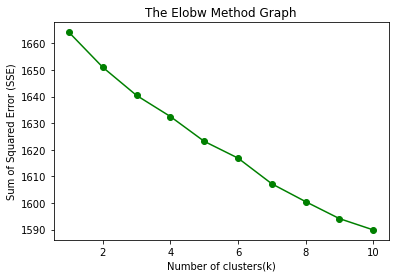

In [11]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list,'go-')  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('Sum of Squared Error (SSE)')  
plt.show() 

In [12]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [13]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [14]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [15]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20)


Cluster 0
need,festival,work,access,year,services,coverage,wha,universal,people,supportnursesandmidwives,amp,care,midwives,world,drtedros,nurses,film,healthforall,health

Cluster 1
use,many,world,let,tobacco,food,cancer,help,disease,new,diseases,healthy,risk,health,million,children,drtedros,people,countries,amp

Cluster 2
spread,research,health,today,amp,media,countries,response,full,international,briefing,china,committee,cases,drc,emergency,ebola,outbreak,drtedros,ncov


In [16]:
# map clusters to appropriate labels 
# cluster_map = {0: "sport", 1: "tech", 2: "religion"}
# # apply mapping
# df['cluster'] = df['cluster'].map(cluster_map)

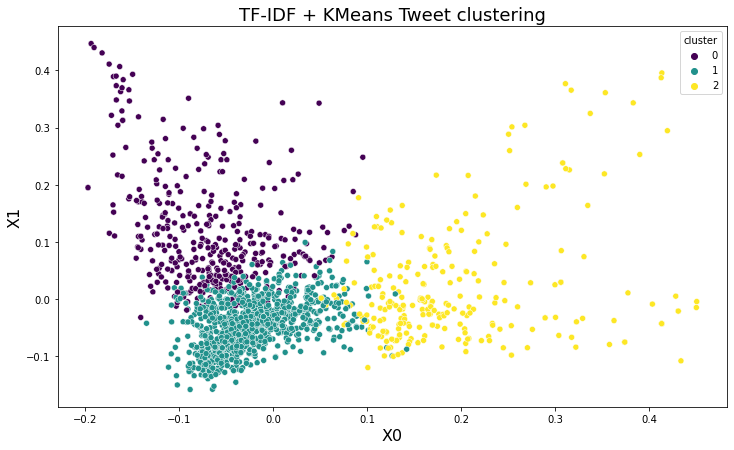

In [17]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans Tweet clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

In [18]:
df_new = pd.DataFrame(X.toarray())
df_new['output'] = df['cluster']

In [19]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,1336,1337,1338,1339,1340,1341,1342,1343,1344,output
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.272535,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
df_new['output'].value_counts()

1    1064
0     381
2     263
Name: output, dtype: int64

In [21]:
cluster_0 = df_new[df_new['output']==0]
X_0 = cluster_0.iloc[:,:-1]

cluster_1 = df_new[df_new['output']==1]
X_1 = cluster_1.iloc[:,:-1]

cluster_2 = df_new[df_new['output']==2]
X_2 = cluster_2.iloc[:,:-1]

In [22]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

# Topic of Tweets with Cluster 1

In [23]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X_0)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X_0)

In [24]:
# Features Dimensions:
nmf_features.shape

(381, 10)

In [25]:
# Components Dimensions:
model.components_.shape

(10, 1345)

In [26]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())
components_df

,ability,able,accelerate,access,according,accurate,achieve,achieving,across,act,...,worldwide,worrying,would,wuhan,year,years,yesterday,yet,young,zero
0,0.000000,0.000000,0.008862,0.000000,0.0,0.0,0.000000,0.038796,0.067677,0.022478,...,0.012732,0.0,0.016711,0.0,0.024916,0.000000,0.04831,0.000000,0.0,0.035417
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.014928,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.021767,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.006131,0.000466,0.012891,...,0.000000,0.0,0.025443,0.0,0.114132,0.055017,0.00000,0.003131,0.0,0.000000
4,0.000000,0.014608,0.016853,0.000000,0.0,0.0,0.015686,0.127770,0.011855,0.000000,...,0.000000,0.0,0.000000,0.0,0.022593,0.000000,0.00000,0.000000,0.0,0.000000
5,0.065792,0.000000,0.000000,0.037341,0.0,0.0,0.000000,0.002377,0.000000,0.000000,...,0.035428,0.0,0.000000,0.0,0.000000,0.001085,0.00000,0.000000,0.0,0.000000
6,0.000000,0.029876,0.000000,0.536342,0.0,0.0,0.006841,0.000000,0.000000,0.000000,...,0.000000,0.0,0.030502,0.0,0.000000,0.009633,0.00000,0.042079,0.0,0.000000
7,0.003070,0.000000,0.000000,0.000000,0.0,0.0,0.006065,0.000000,0.000000,0.000000,...,0.000000,0.0,0.008745,0.0,0.000000,0.015131,0.00000,0.000000,0.0,0.000000
8,0.003458,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.002678,0.008003,0.009679,...,0.000000,0.0,0.007371,0.0,0.684092,0.000000,0.00000,0.000000,0.0,0.000000
9,0.039241,0.000000,0.000000,0.000000,0.0,0.0,0.314737,0.000000,0.000000,0.000000,...,0.024571,0.0,0.024702,0.0,0.014470,0.000000,0.00000,0.000000,0.0,0.007637


In [27]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
health           1.744777
amp              0.957916
system           0.745893
drtedros         0.483052
global           0.457808
strengthen       0.414521
healthworkers    0.359099
promote          0.344563
drc              0.338384
minister         0.330983
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
film            1.312178
festival        0.649809
health          0.390882
winners         0.290903
category        0.245427
films           0.225956
find            0.219548
ever            0.205053
first           0.200669
healthforall    0.179725
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
nurses                      1.182157
midwives                    0.976143
supportnursesandmidwives    0.401748
care                        0.268933
womensday                   0.243022
communities                 0.195915
handhygiene                 0.138385
thank                       0

In [28]:
def plot_topic_modeling_graph(components_df,top_words=50):
    for topic in range(components_df.shape[0]):
        print(f'For topic {topic+1}:')
        components_df.iloc[topic].nlargest(top_words).sort_values().plot.barh(figsize=(15,15))
        plt.show()

For topic 1:


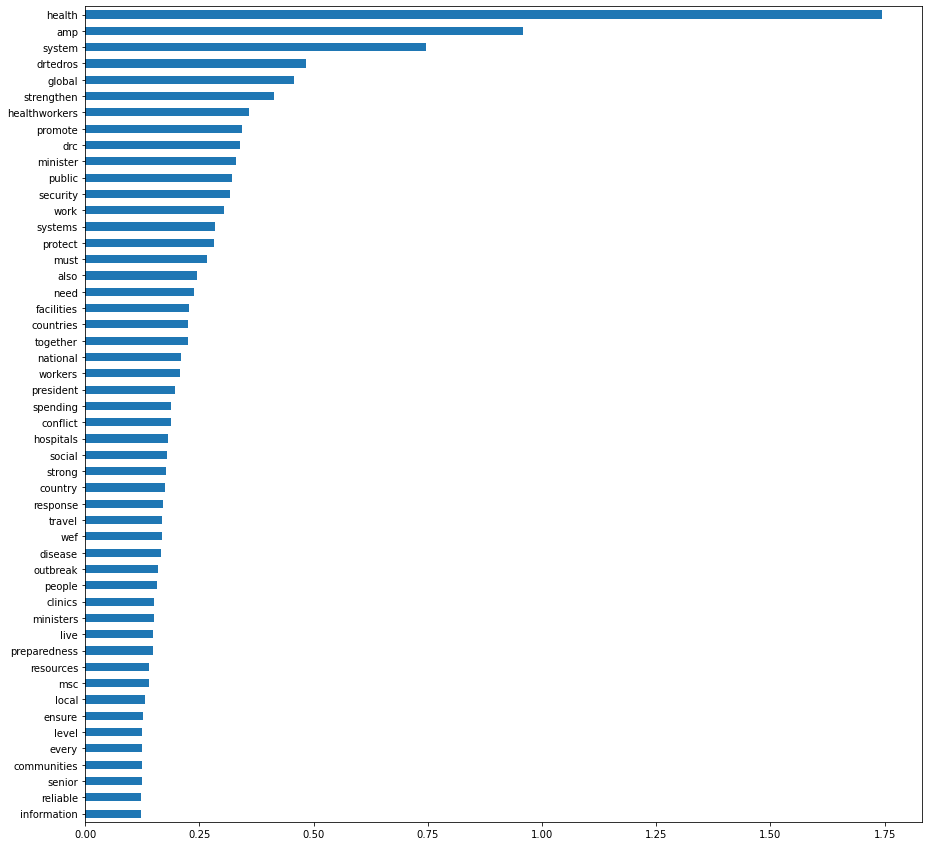

For topic 2:


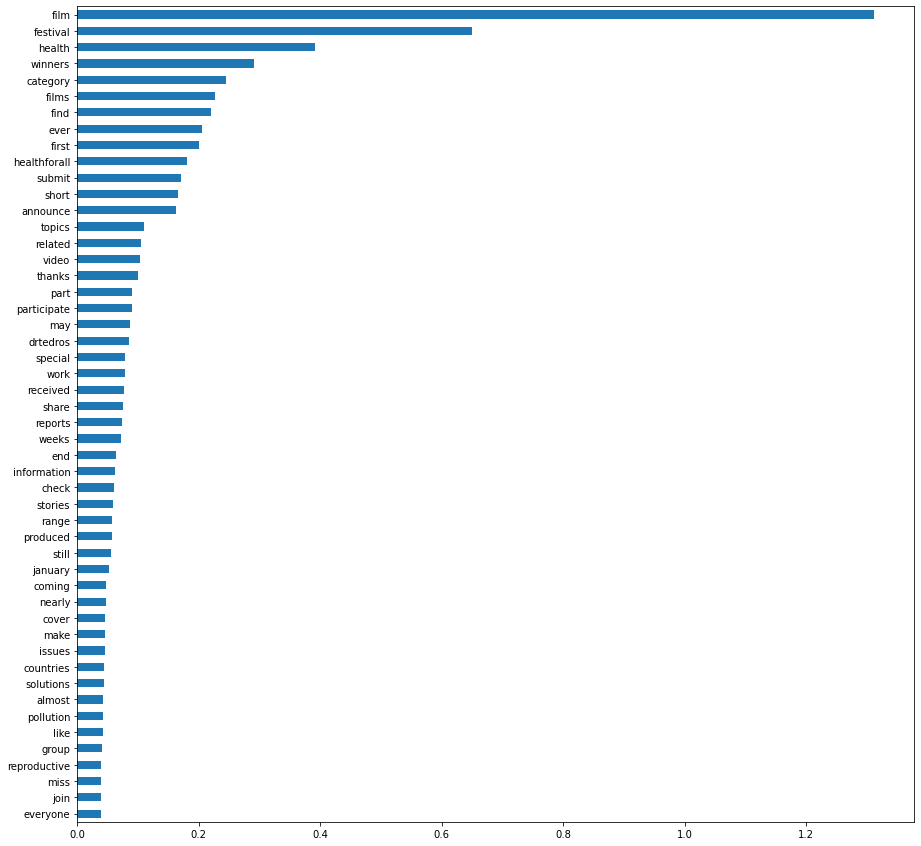

For topic 3:


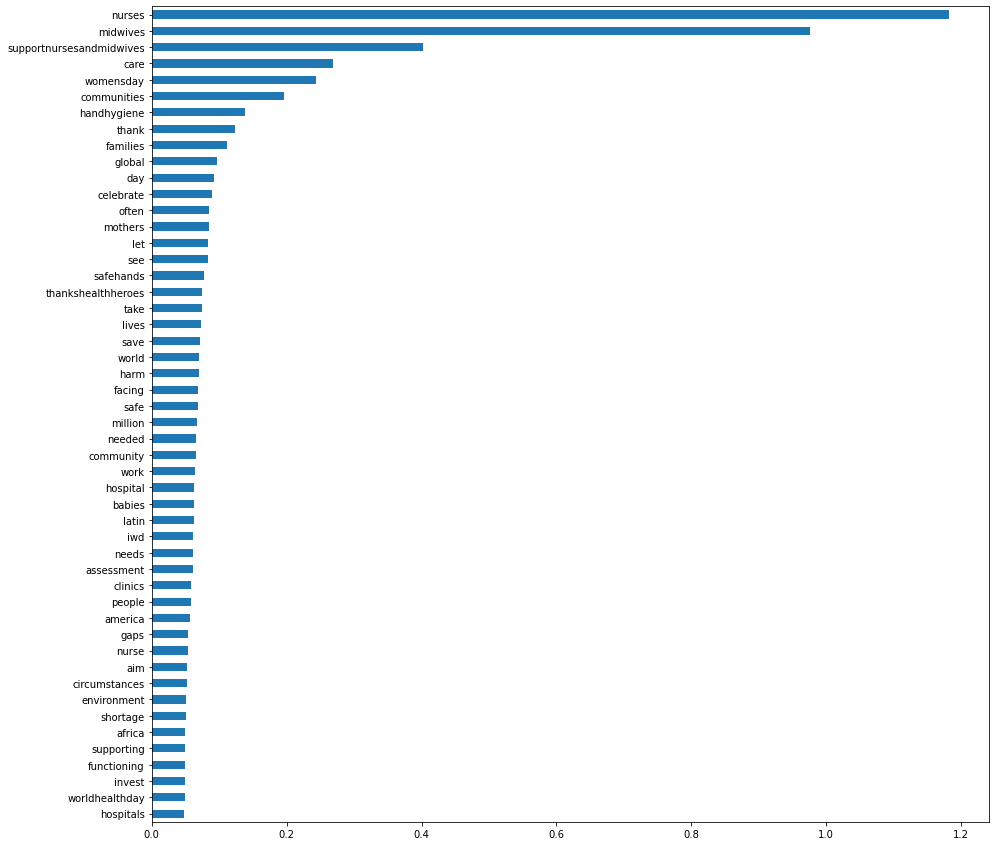

For topic 4:


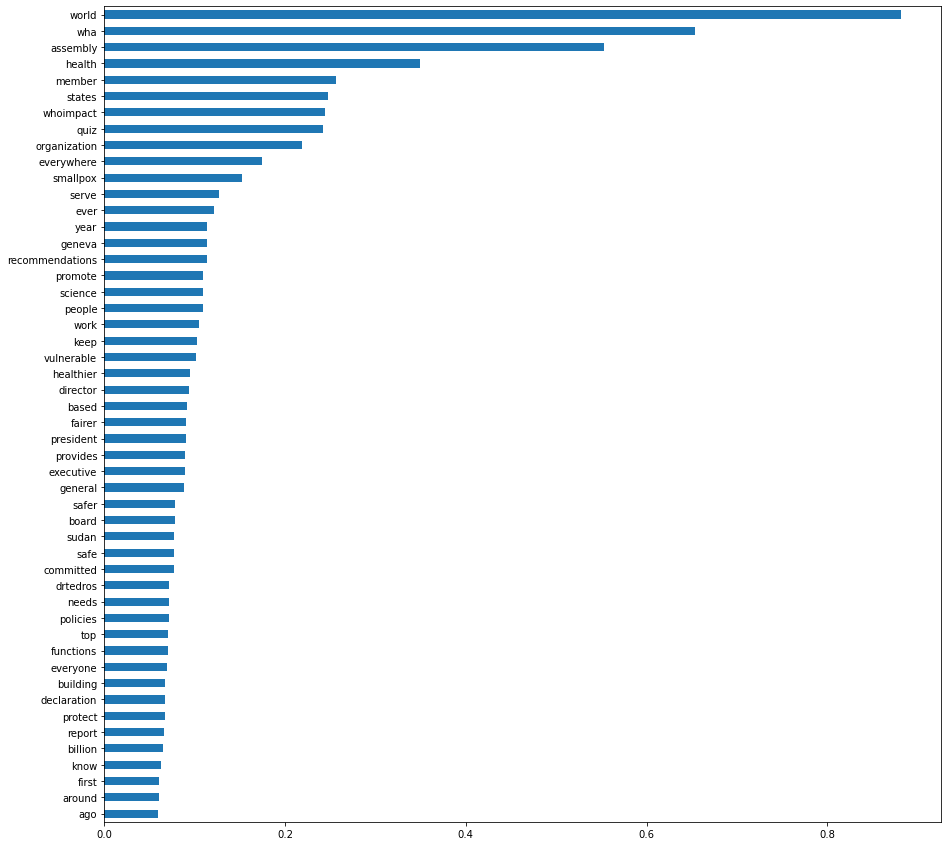

For topic 5:


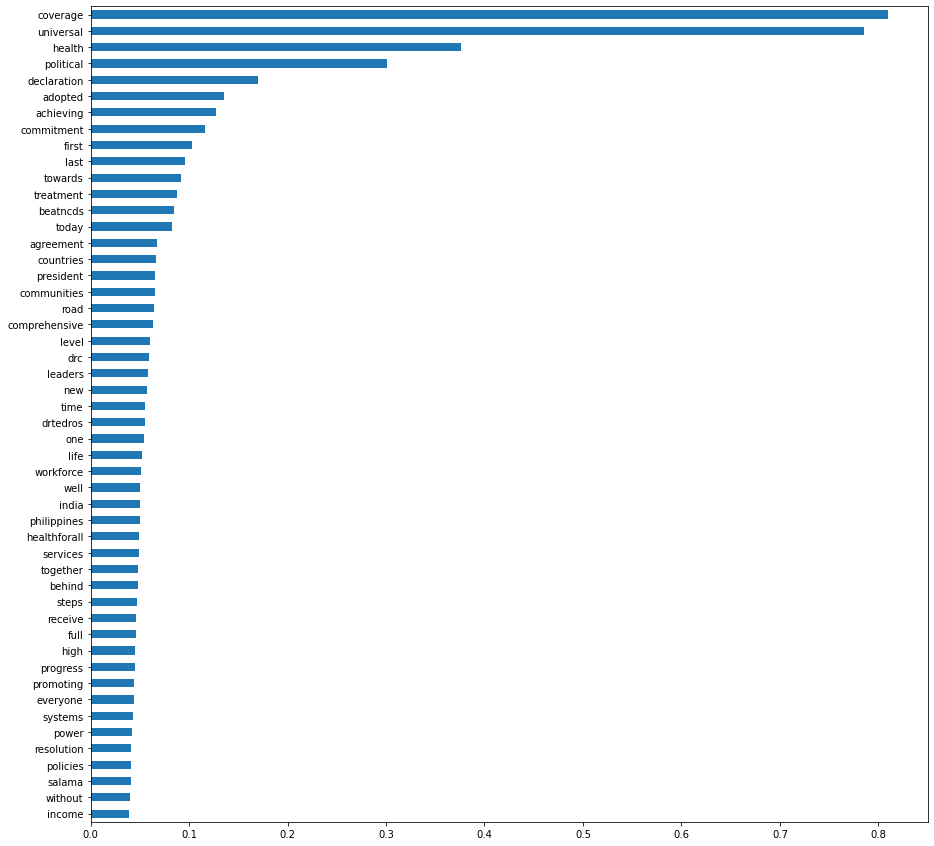

For topic 6:


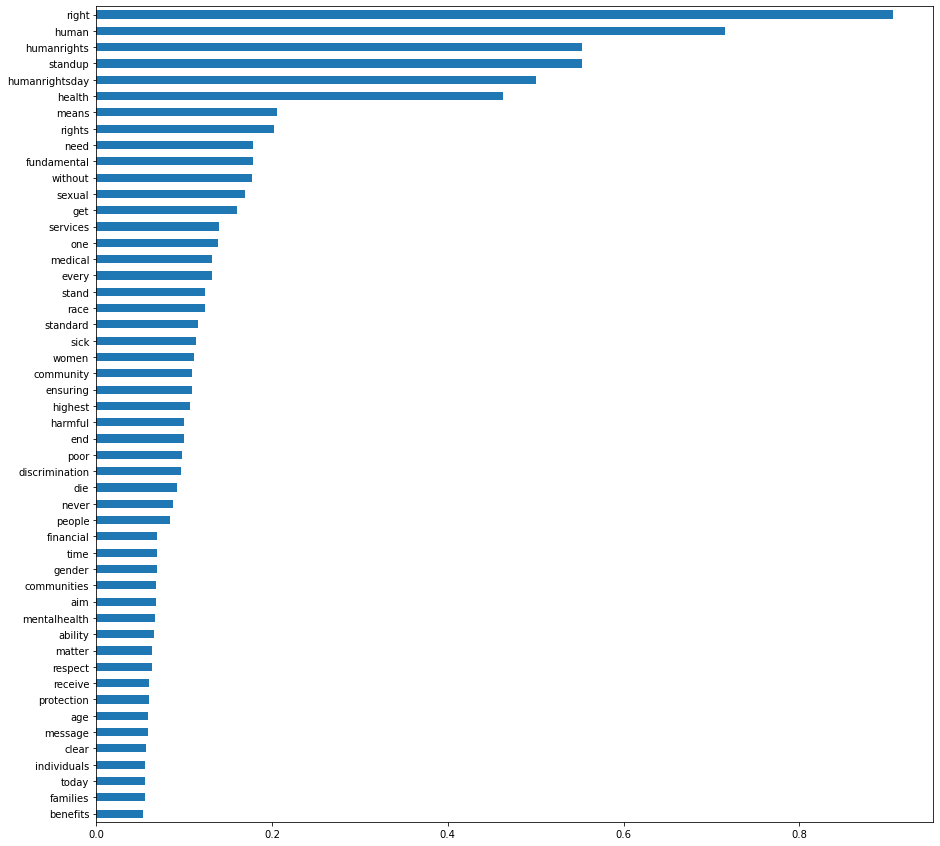

For topic 7:


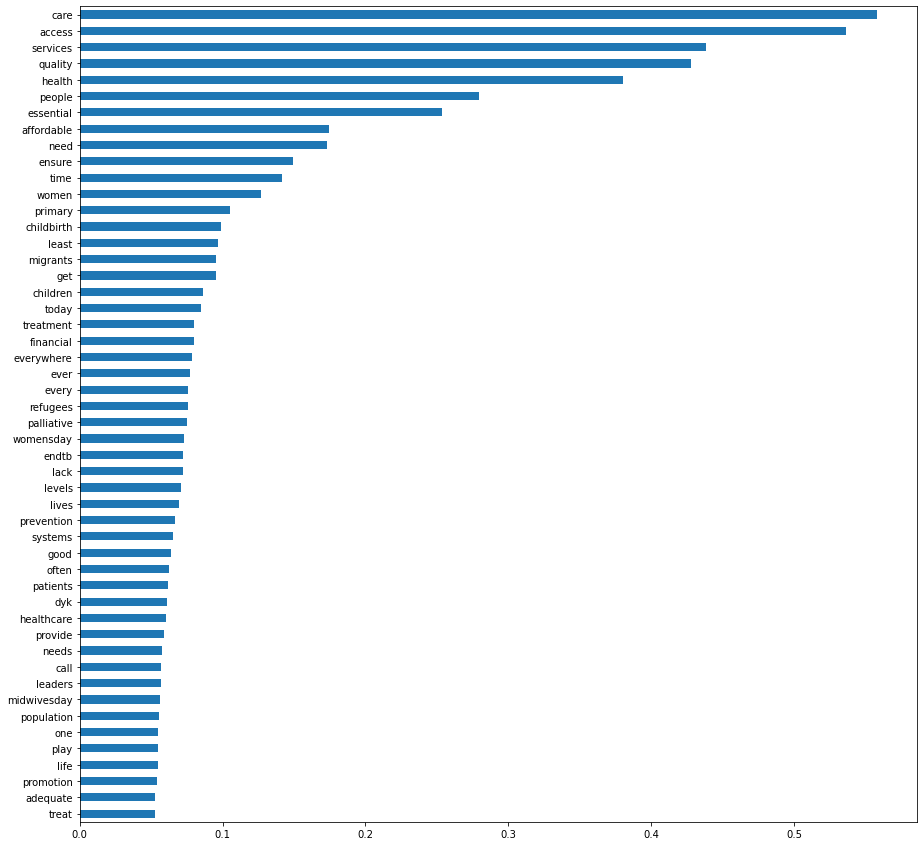

For topic 8:


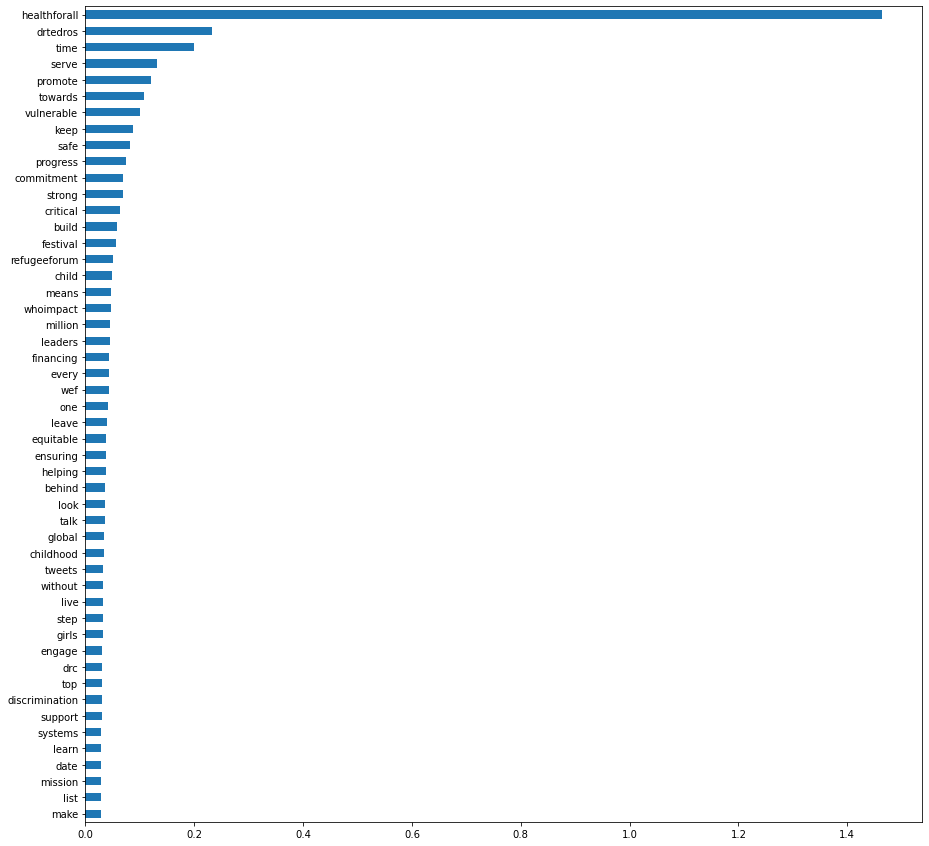

For topic 9:


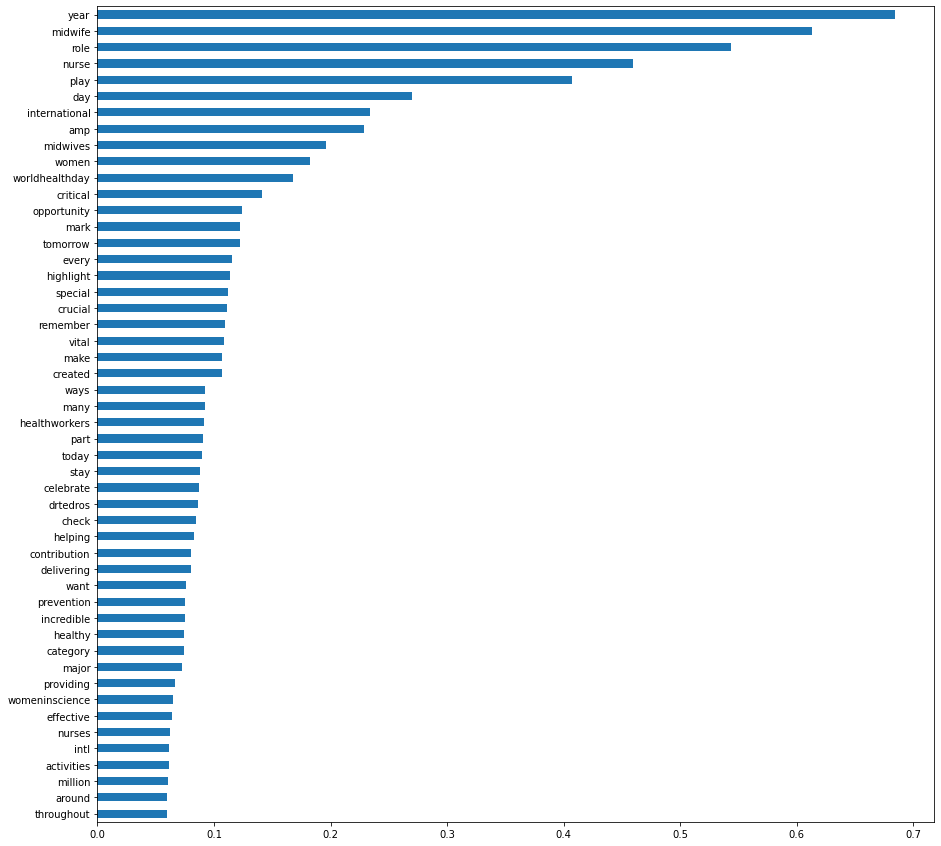

For topic 10:


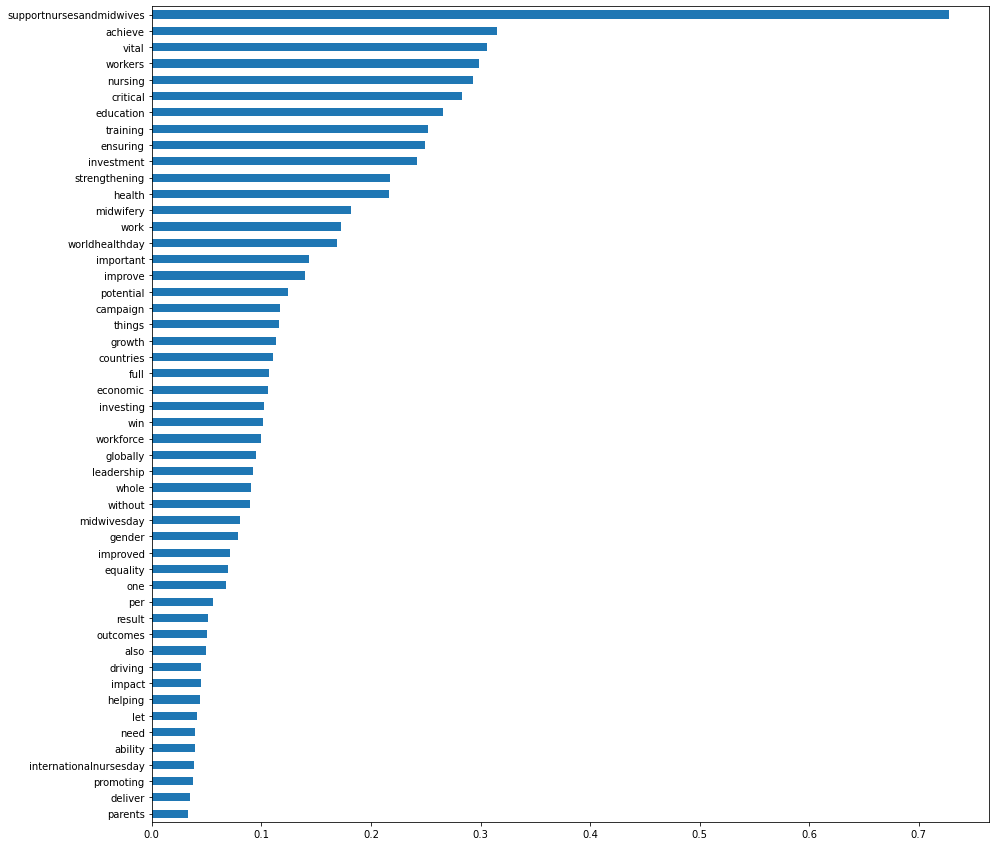

In [29]:
plot_topic_modeling_graph(components_df,top_words=50)

# Topic of Tweets with Cluster 2

In [30]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X_1)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X_1)


# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())


In [31]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
cancer            1.332049
diseases          0.711441
disease           0.704998
risk              0.649718
diabetes          0.492001
women             0.490096
heart             0.445371
worldcancerday    0.392281
stroke            0.375971
deaths            0.372496
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
healthy              1.308509
happynewyear         1.181176
resolution           1.087077
eat                  0.129593
tips                 0.120942
primaryhealthcare    0.113143
breastfeeding        0.104590
roadsafety           0.104234
limit                0.102422
handhygiene          0.100754
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
amp         1.404904
together    0.323576
work        0.230533
like        0.226907
new         0.210671
stay        0.180085
help        0.176776
kids        0.174298
working     0.151098
support     0.141110
Name: 2, dtype: fl

For topic 1:


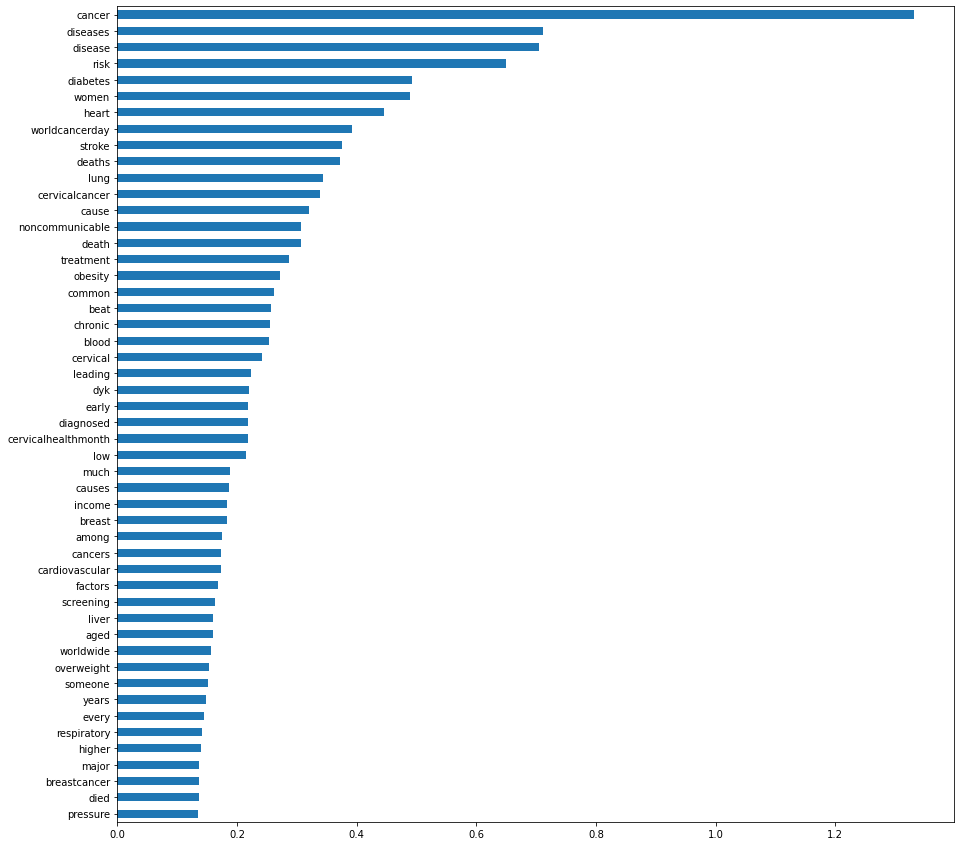

For topic 2:


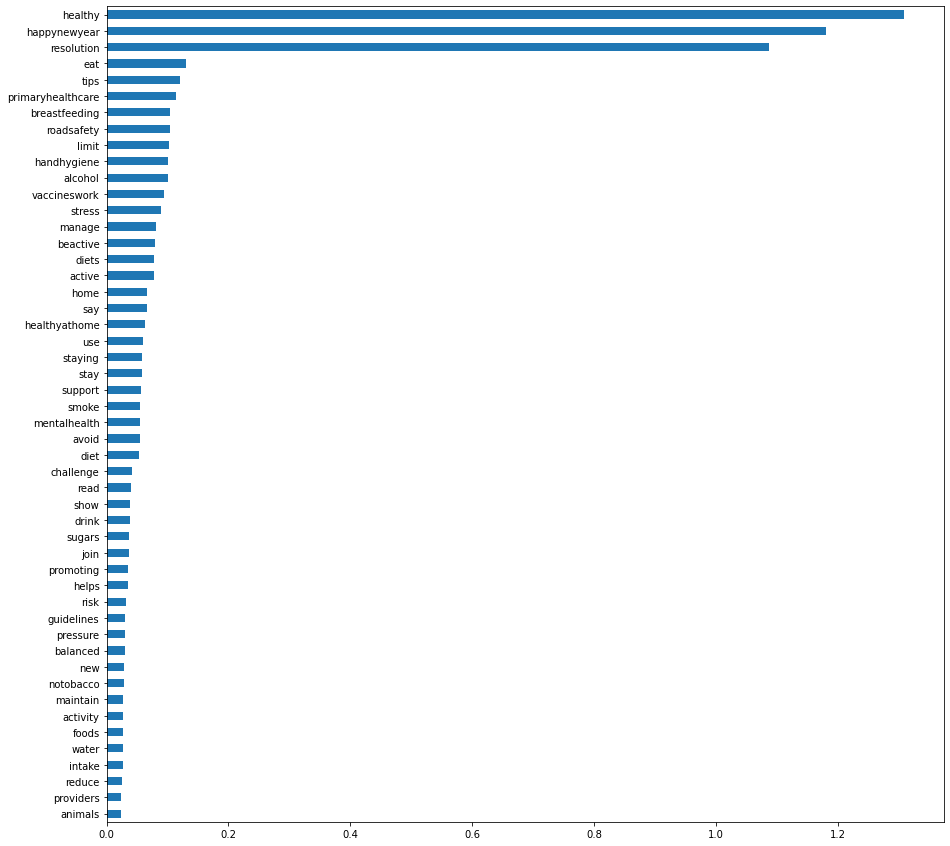

For topic 3:


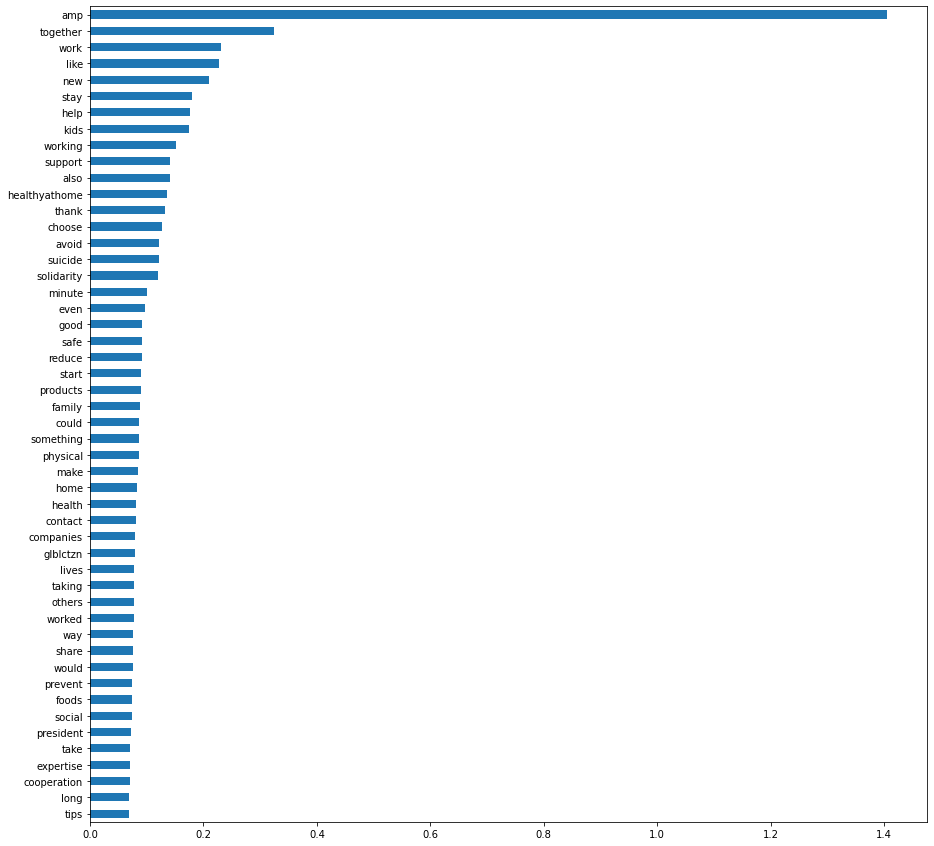

For topic 4:


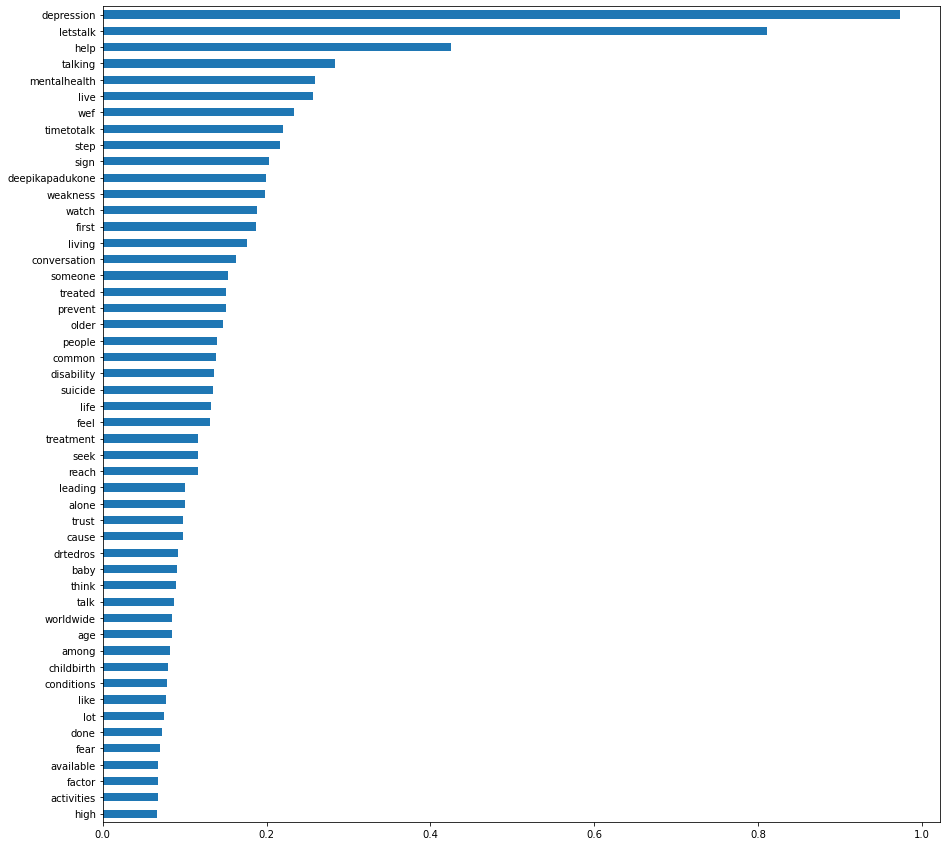

For topic 5:


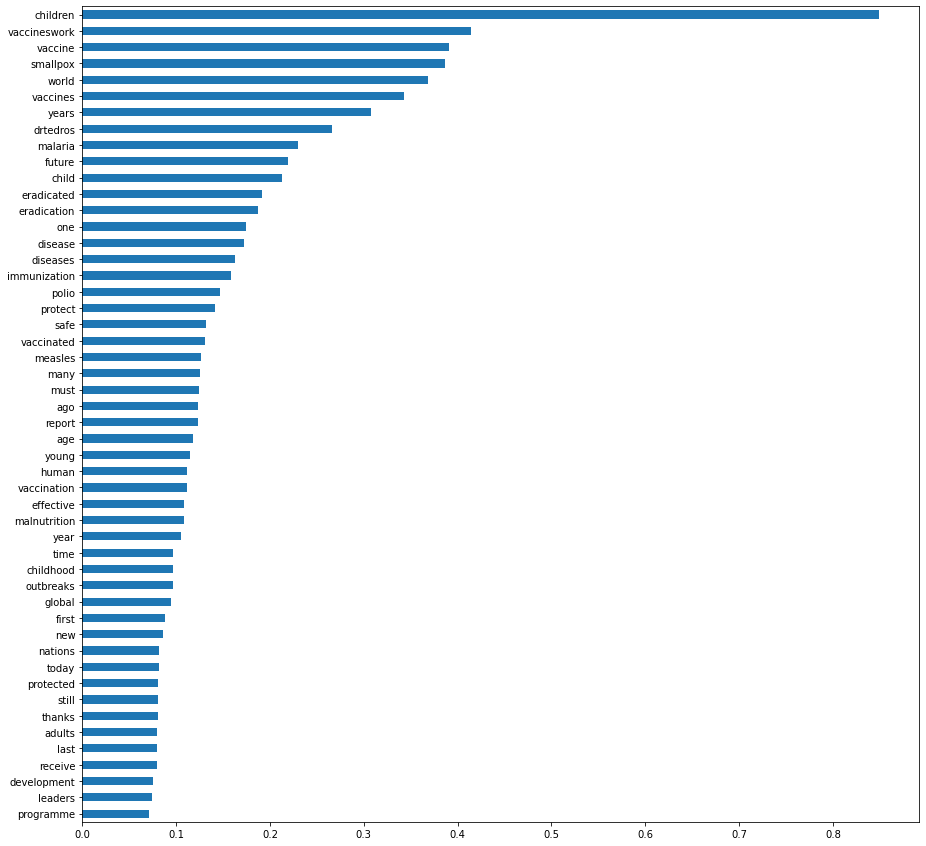

For topic 6:


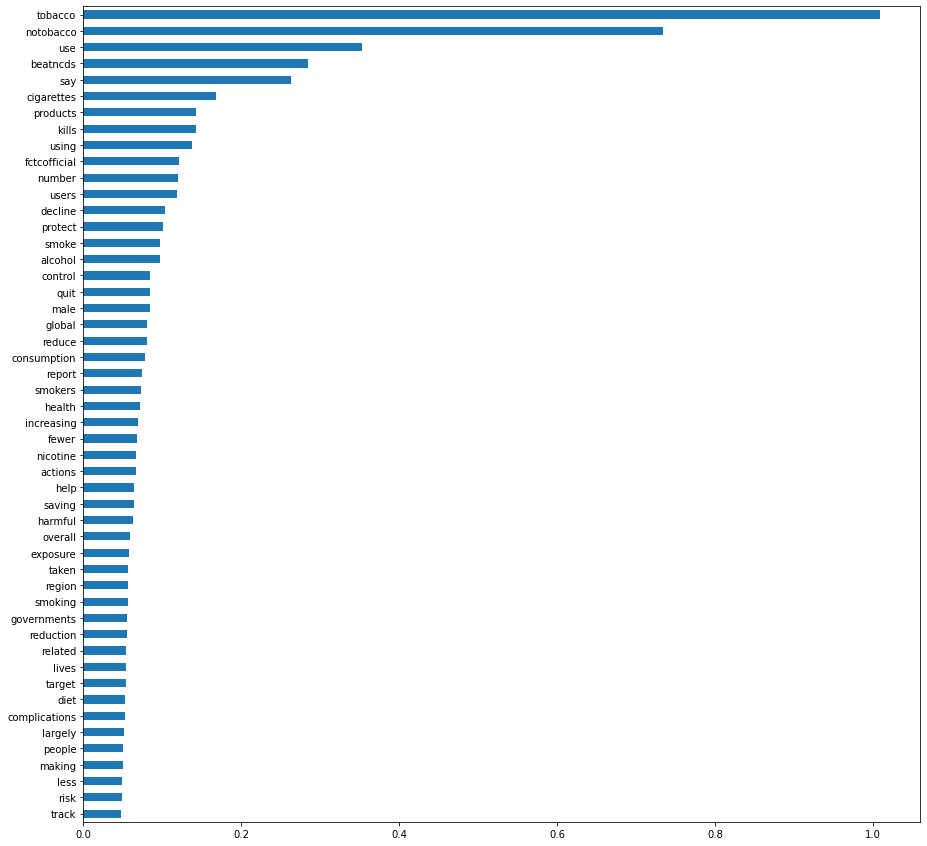

For topic 7:


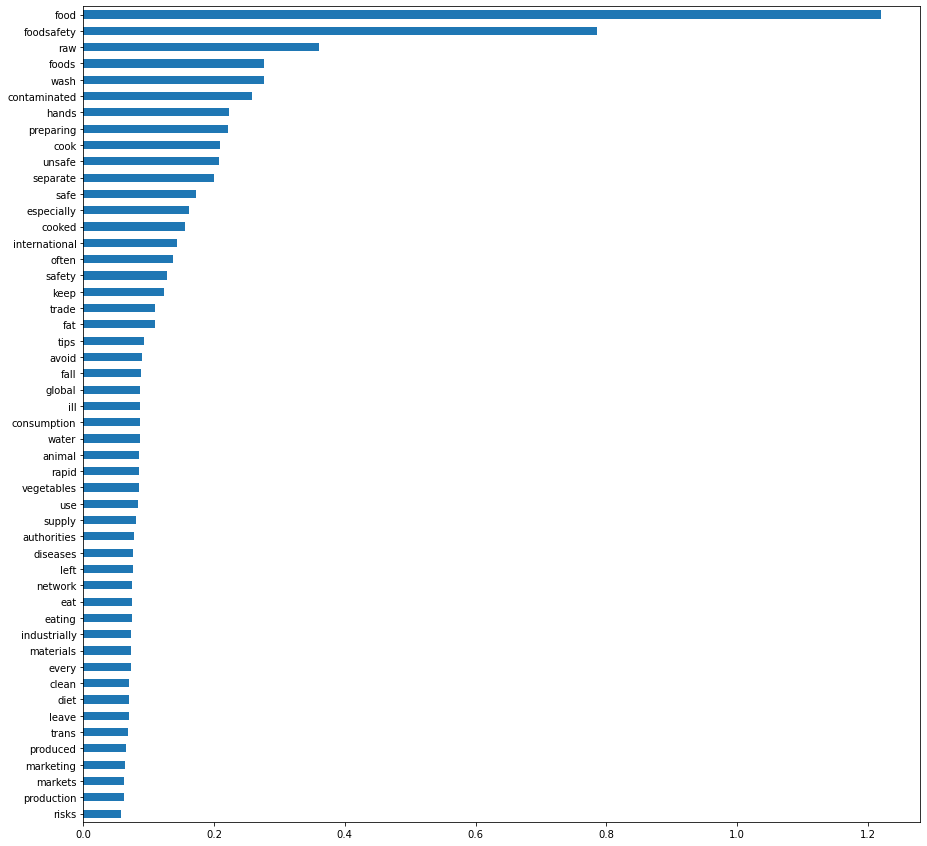

For topic 8:


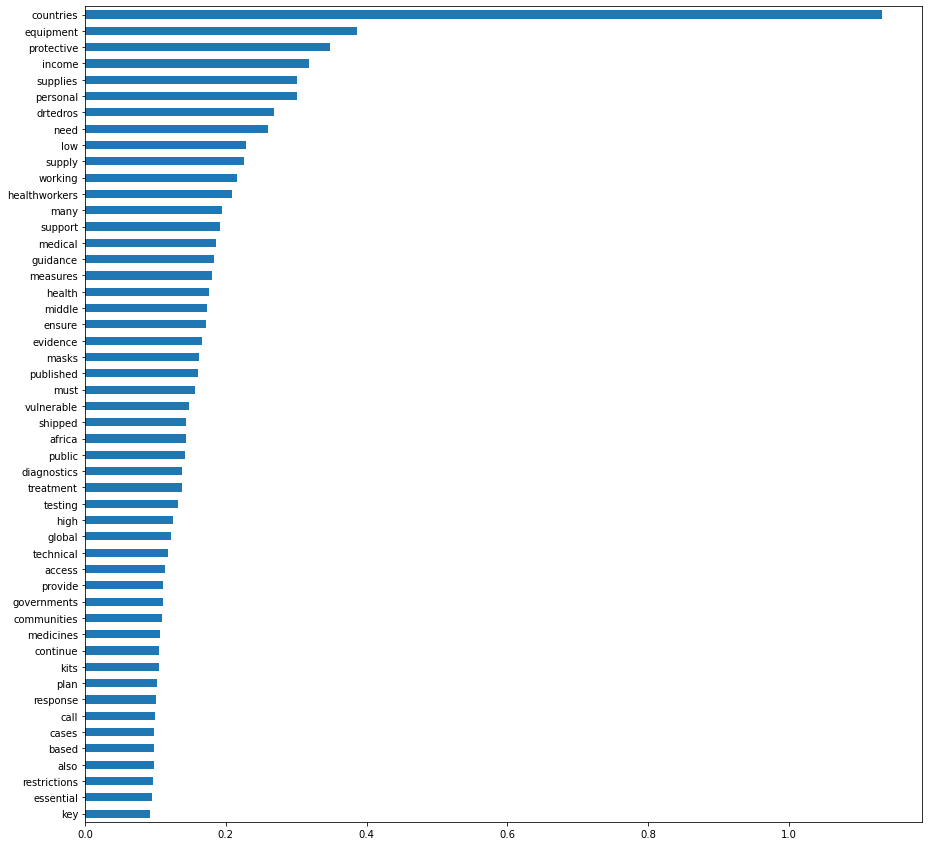

For topic 9:


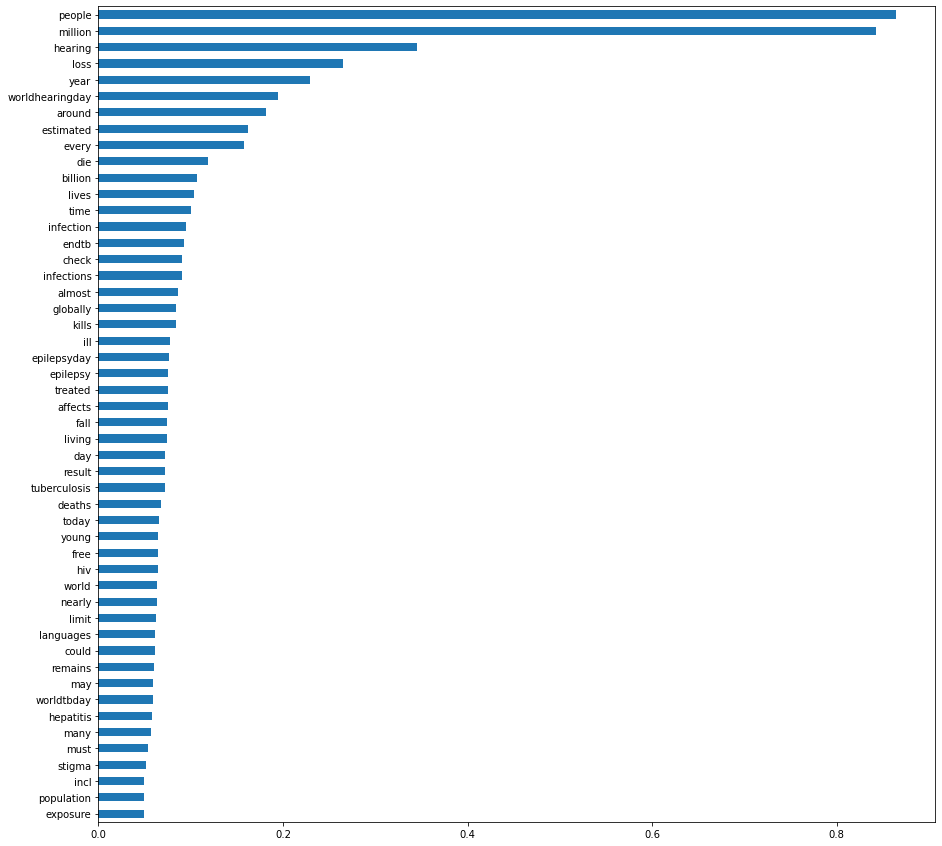

For topic 10:


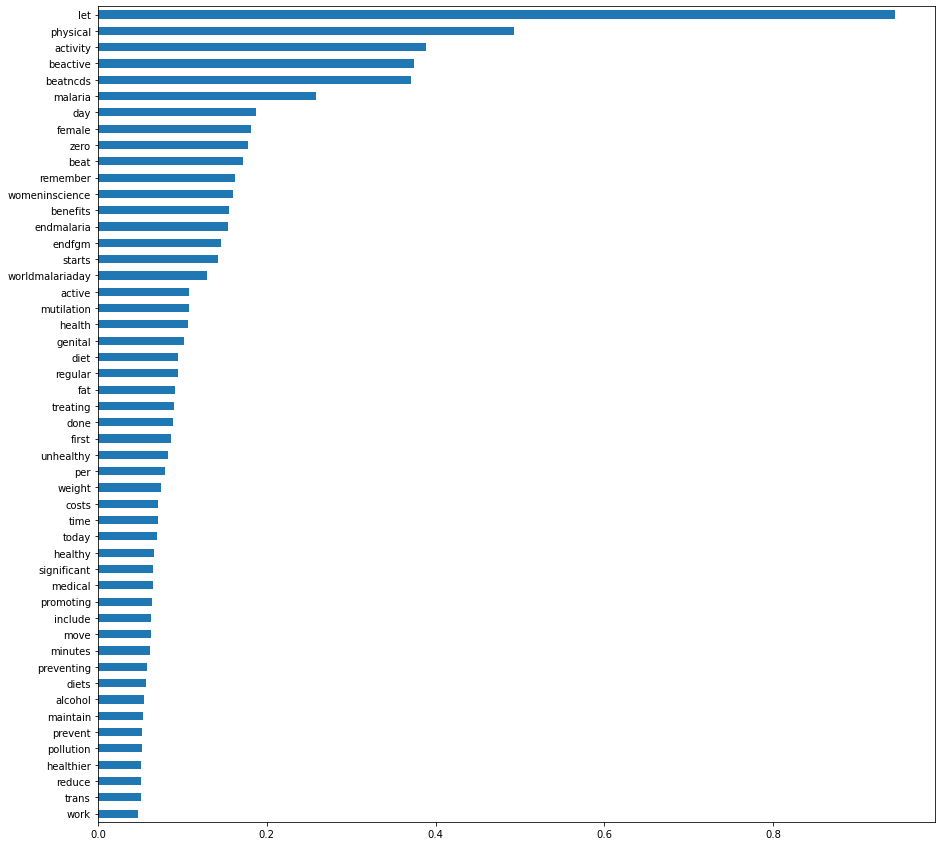

In [32]:
plot_topic_modeling_graph(components_df,top_words=50)

# Topic of Tweets with Cluster 3

In [33]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X_2)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X_2)


# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())


In [34]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
ncov         2.463818
drtedros     0.689864
outbreak     0.361081
wear         0.204822
response     0.203236
million      0.199631
live         0.195711
countries    0.183544
sending      0.180407
donors       0.165744
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
emergency        0.869713
committee        0.643179
international    0.615992
concern          0.432180
public           0.402815
health           0.311560
regulations      0.285204
ebola            0.276436
drc              0.197659
outbreak         0.172787
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
china        0.923979
cases        0.883705
outside      0.517299
confirmed    0.456914
deaths       0.442866
death        0.266960
drtedros     0.239036
countries    0.238663
today        0.225570
geneva       0.210183
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
briefing      1.361026

For topic 1:


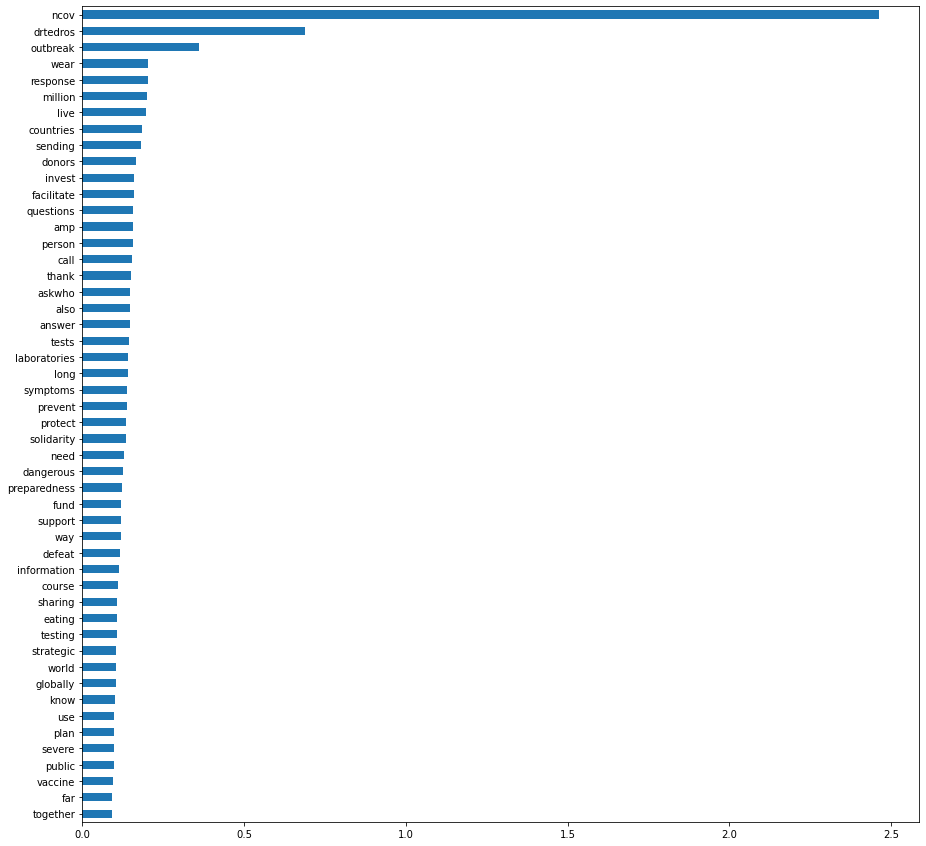

For topic 2:


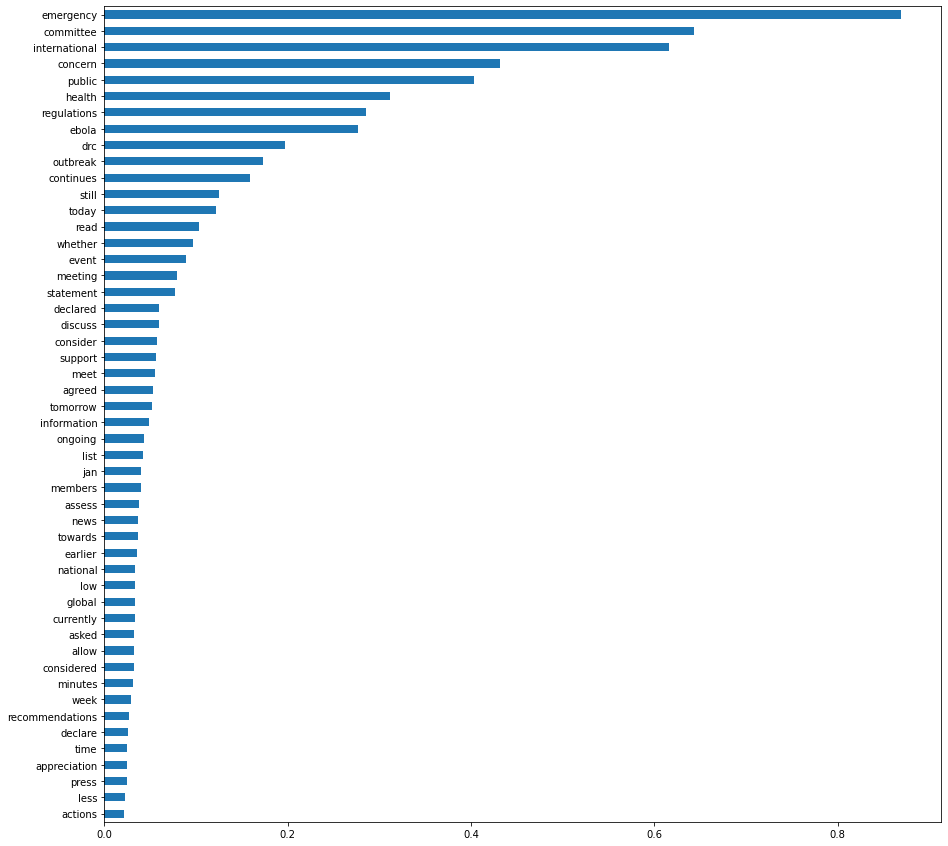

For topic 3:


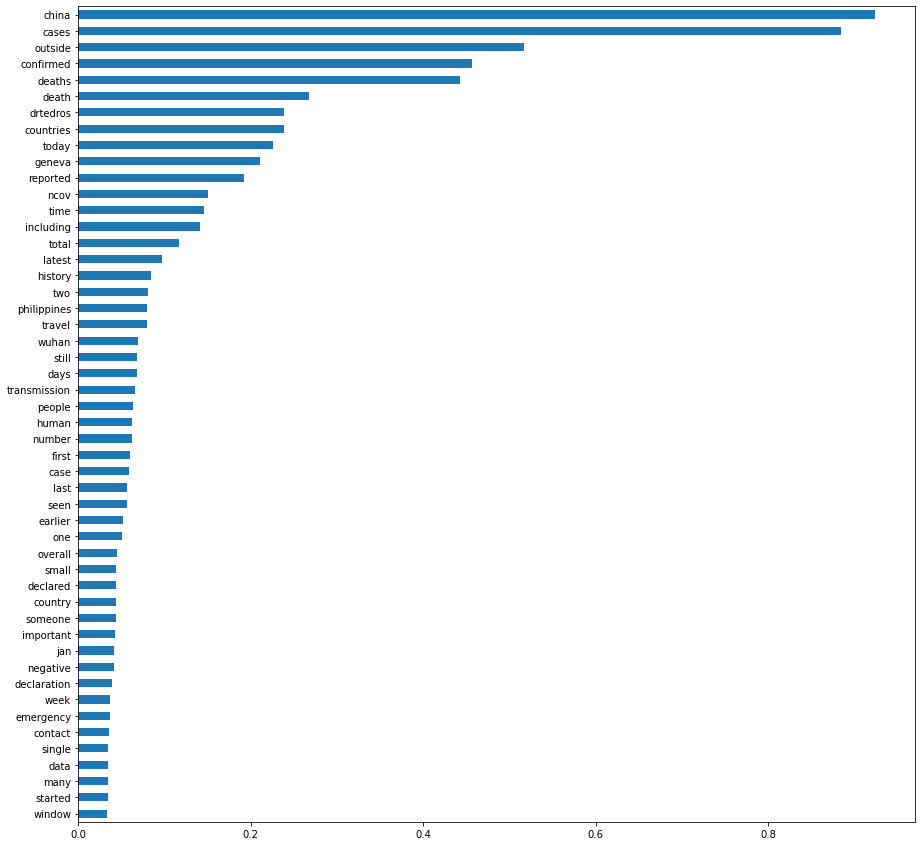

For topic 4:


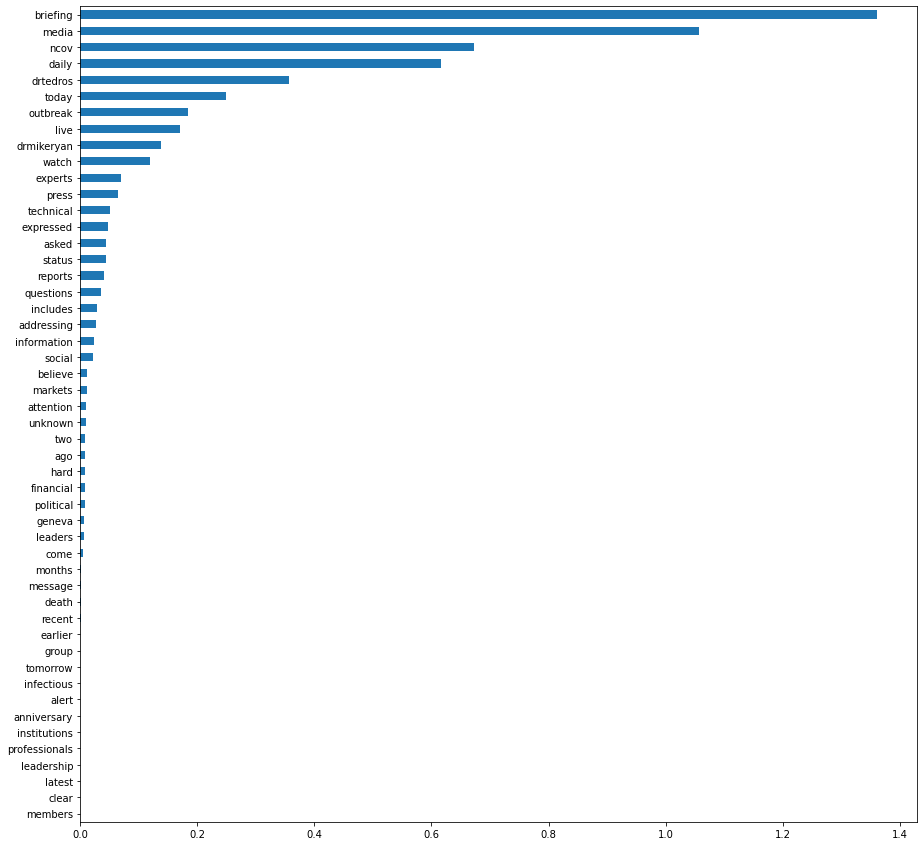

For topic 5:


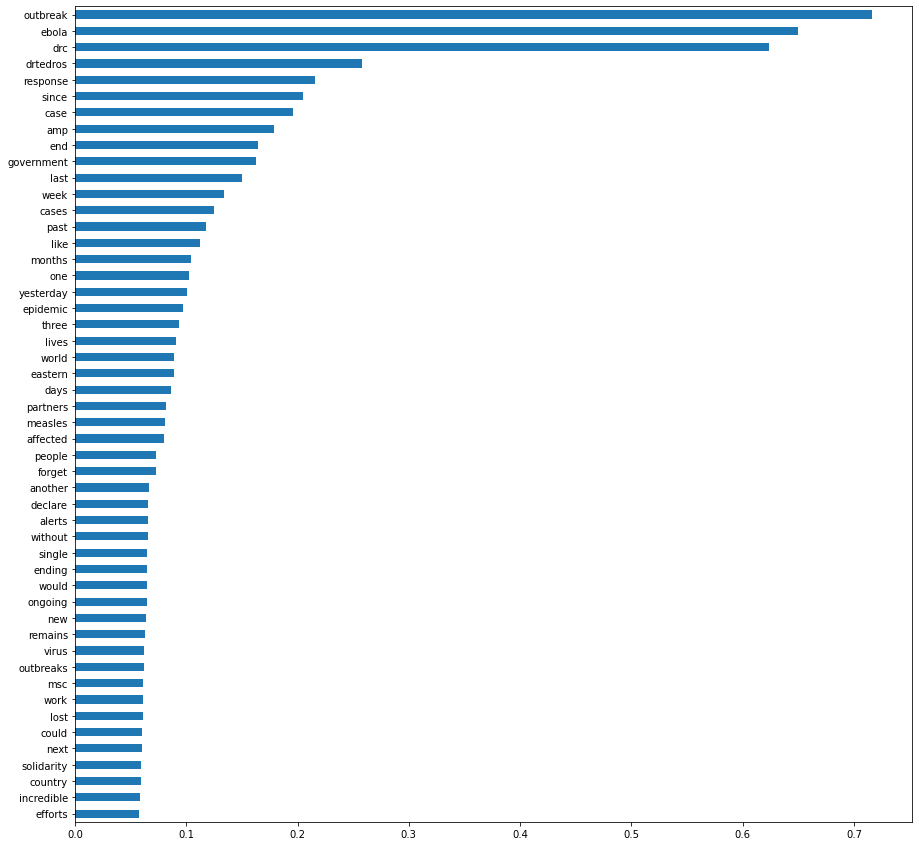

For topic 6:


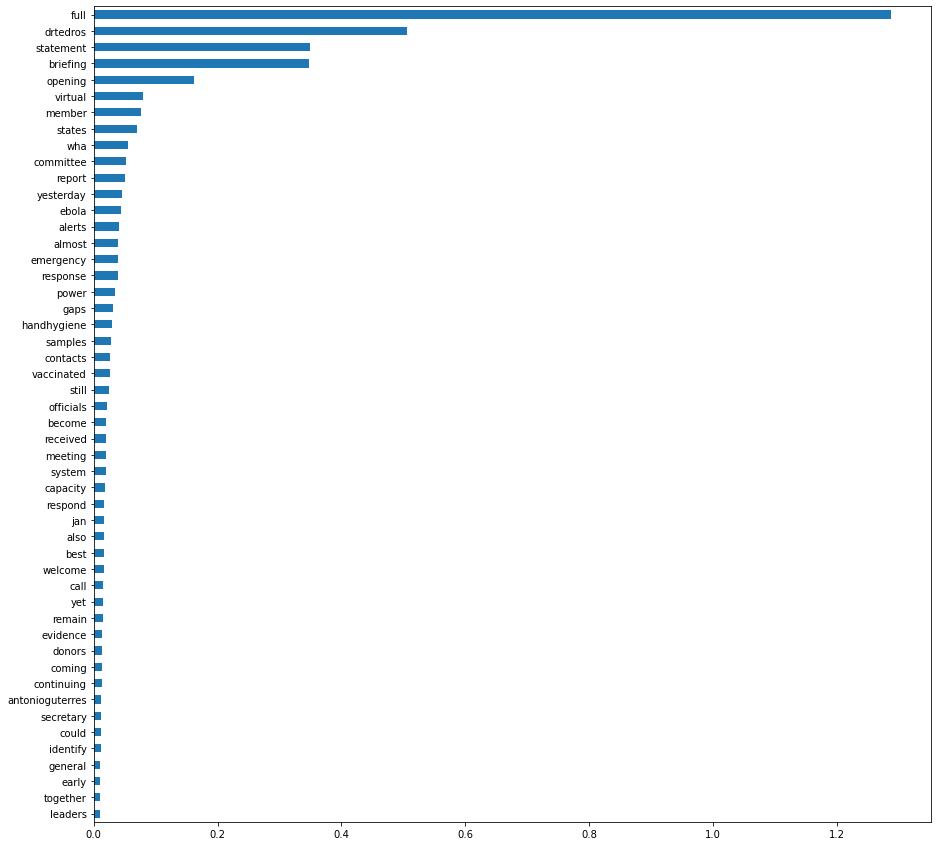

For topic 7:


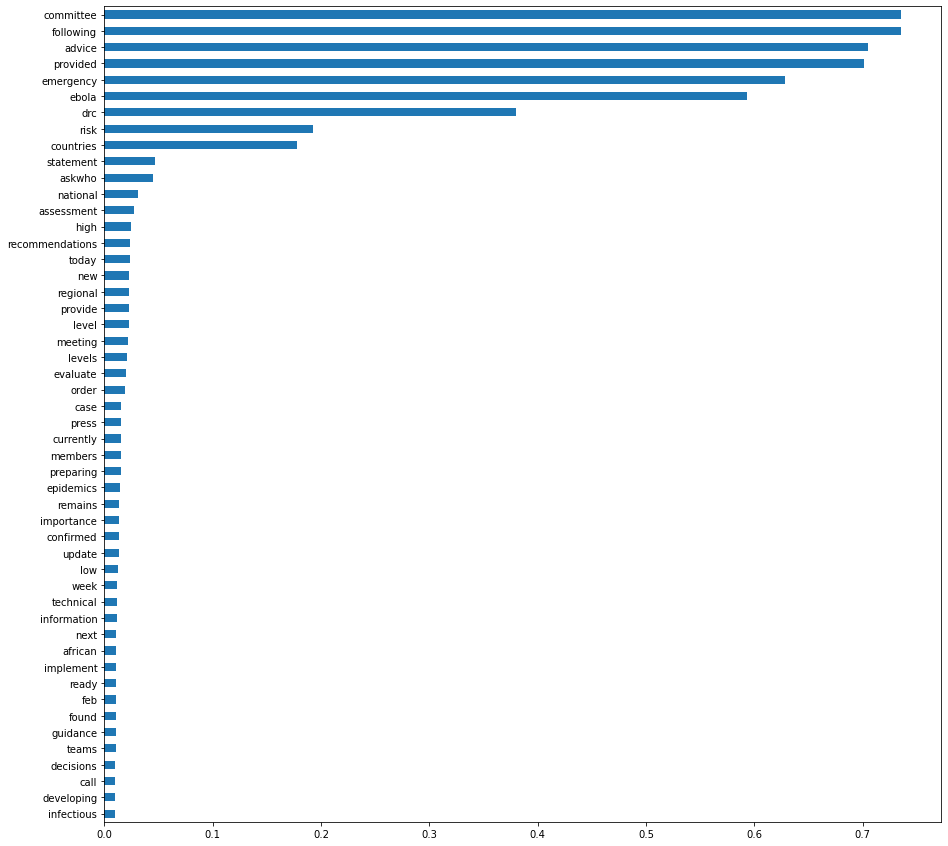

For topic 8:


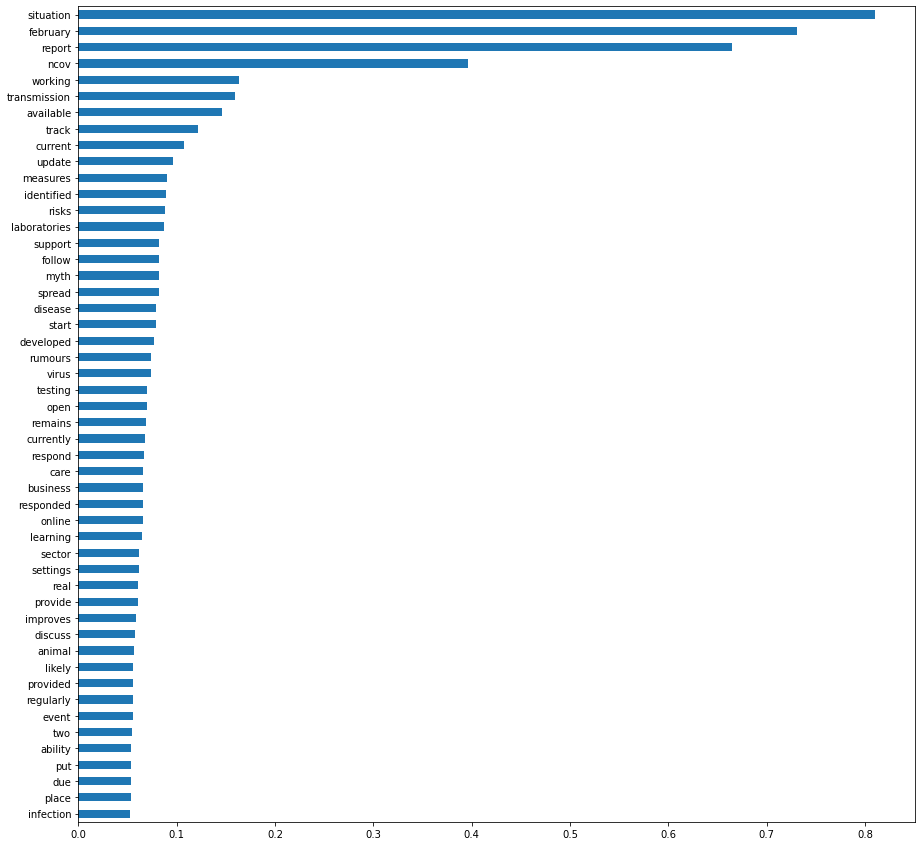

For topic 9:


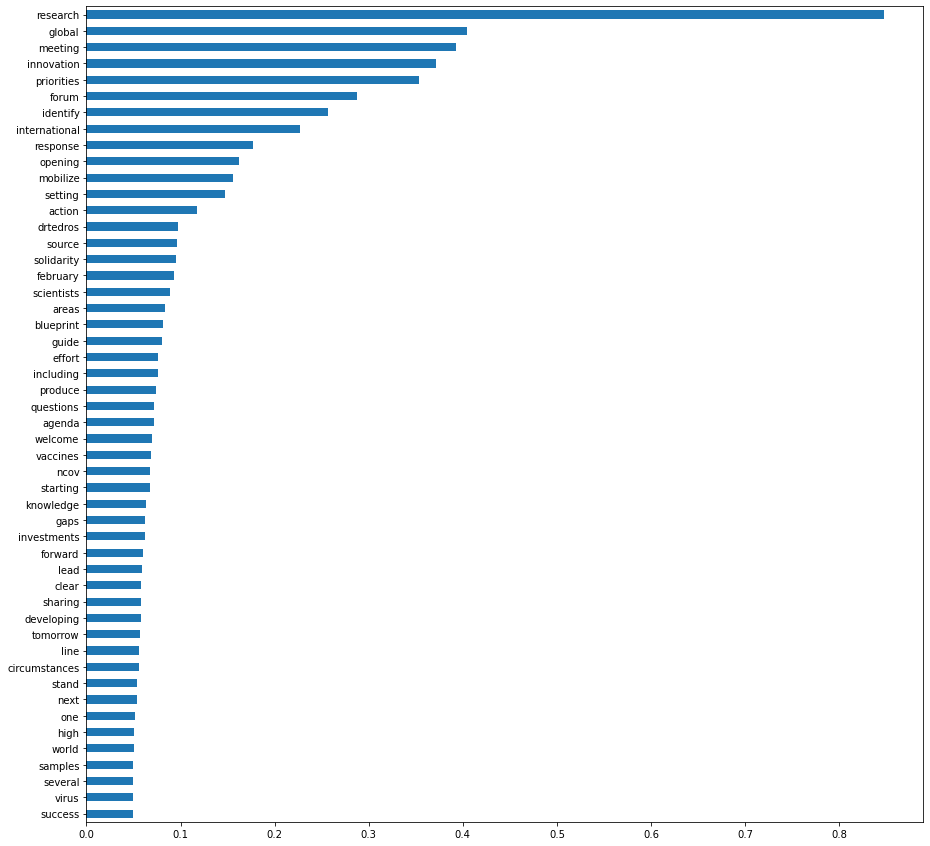

For topic 10:


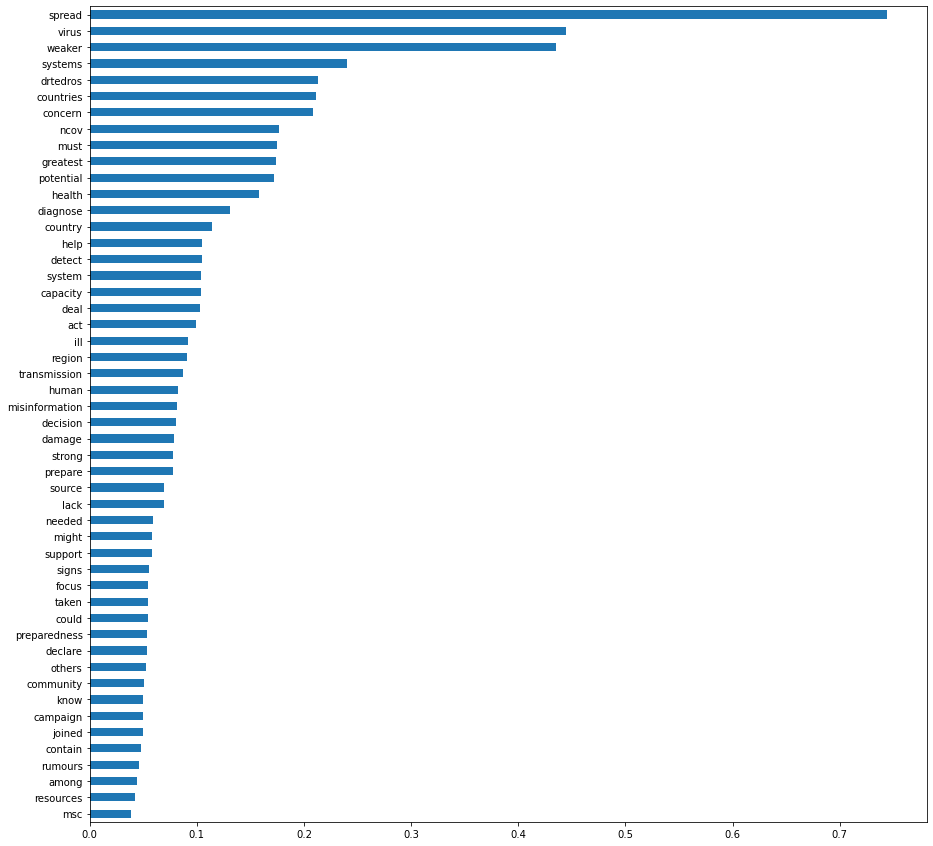

In [35]:
plot_topic_modeling_graph(components_df,top_words=50)